In [6]:
import numpy as np 
import pydicom as dicom
import os 
import matplotlib.pyplot as plt 
import pandas as pd 
import nrrd
import cv2
from keras.preprocessing.image import array_to_img
import PIL
from PIL import ImageOps
from PIL import Image
import os
from tensorflow import keras
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img

In [210]:
#Load and sort slices:
def load_scan(path):
    scans = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    scans=np.array(scans)
    scan_z=[]
    for scan in scans:
        scan_z.append(scan.SliceLocation)
    i = np.argsort(scan_z)
    scans=scans[i[::-1]]
    return scans

#Load contour:
def load_contour(path):
    contour,header= nrrd.read(path)
    return contour

#Find the center slice index:
def center_slice(scan, contour):
    tumour=[]
    for i in range(len(contour[0,0])):
        if (1 in contour[:,:,i])==True:
            tumour.append(i)
    index=tumour[int((tumour[-1]-tumour[0])/2)]
    center_scan=scan[index].pixel_array
    center_contour=contour[:,:,index]
    return center_scan, center_contour

#Crop the centroid of tumor:
def crop_centroid(scan,contour,img_size):
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    size=int(img_size/2)
    crop_scan = scan[cY-size:cY+size,cX-size:cX+size]
    crop_contour = contour[cY-size:cY+size,cX-size:cX+size]
    return crop_scan, crop_contour

In [13]:
def center_slice(contour):
    tumour=[]
    for i in range(len(contour[0,0])):
        if (1 in contour[:,:,i])==True:
            tumour.append(i)
    index=tumour[int((tumour[-1]-tumour[0])/2)]
    center_contour=contour[:,:,index]
    return center_contour

def crop_centroid(contour,img_size):
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    size=int(img_size/2)
    crop_contour = contour[cY-size:cY+size,cX-size:cX+size]
    return crop_contour

In [223]:
contour_path = "C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_data/RD_Slicer3D"
# dicom_path= "C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_data/RD_Dicom"
dicom_path= "Y:/DWI/"
for patient_id in os.listdir(contour_path):
    for week in os.listdir(contour_path+'/'+patient_id):
        print(patient_id+'/'+week[0:2])
        contour= load_contour(contour_path+'/'+patient_id+'/'+week)
        scan= load_scan(dicom_path+'/'+patient_id+'/'+week[0:2])
        center_scan, center_contour=center_slice(scan, contour)
        crop_scan,crop_contour= crop_centroid(center_scan, center_contour,64)
        nrrd.write("Contour-"+patient_id+"-"+week[0:2]+ ".nrrd", crop_contour)
        nrrd.write("Scan-"+patient_id+"-"+week[0:2]+ ".nrrd", crop_scan)
        print("Done")
        

1049397/W1
Done
1049397/W2
Done
1049397/W3
Done
1049397/W4
Done
1049397/W5
Done
1049397/W6
Done
2139028/W1
Done
2139028/W2
Done
2139028/W3
Done
2139028/W4
Done
2139028/W5
Done
2377620/W1
Done
2377620/W2
Done
2377620/W3
Done
2377620/W4
Done
2377620/W5
Done
2386449/W1
Done
2386449/W2
Done
2386449/W3
Done
2386449/W4
Done
2386449/W5
Done
2386449/W6
Done
2403028/W1
Done
2403028/W2
Done
2403028/W3
Done
2403028/W4
Done
2403028/W5
Done
2403028/W6
Done
2413785/W1
Done
2413785/W2
Done
2413785/W3
Done
2413785/W4
Done
2413785/W5
Done
2413785/W6
Done
2419611/W1
Done
2419611/W2
Done
2419611/W3
Done
2419611/W4
Done
2419611/W5
Done
2419611/W6
Done
2455275/W1
Done
2455275/W2
Done
2455275/W3
Done
2455275/W4
Done
2455275/W5
Done
2459017/W1
Done
2459017/W2
Done
2459017/W3
Done
2459017/W4
Done
2467000/W1
Done
2467000/W2
Done
2467000/W3
Done
2467000/W4
Done
2467000/W5
Done
2467000/W6
Done
2467929/W1
Done
2467929/W2
Done
2467929/W3
Done
2467929/W4
Done
2510278/W1
Done
2510278/W2
Done
2510278/W3
Done
2510278/

1049397


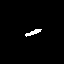

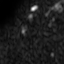

2139028


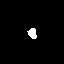

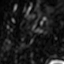

2377620


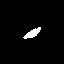

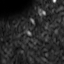

2386449


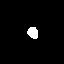

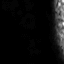

2403028


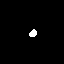

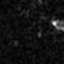

2413785


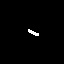

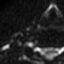

2419611


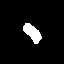

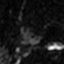

2455275


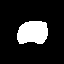

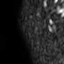

2459017


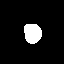

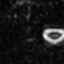

2467000


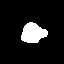

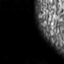

2467929


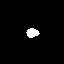

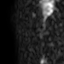

2510278


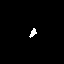

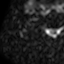

2521725


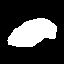

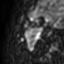

2541392


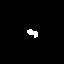

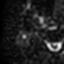

2547570


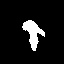

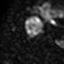

2551521


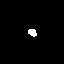

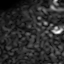

2570357


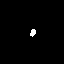

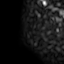

2574697


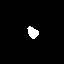

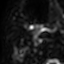

2587907


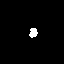

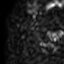

2591335


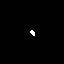

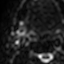

2593206


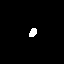

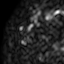

2604993


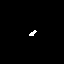

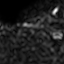

2609170


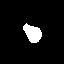

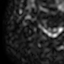

862797


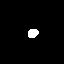

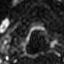

895844


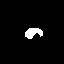

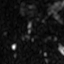

In [234]:
contour_path = "C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_data/RD_Slicer3D"
# dicom_path= "C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_data/RD_Dicom"
dicom_path= "Y:/DWI/"
for patient_id in os.listdir(contour_path):
    print(patient_id)
    crop_contour=load_contour("C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_scripts/Contour-"+patient_id+"-W1.nrrd")
    mask = np.expand_dims(crop_contour, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)
    image_arr=crop_contour=load_contour("C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_scripts/Scan-"+patient_id+"-W1.nrrd")
    slices=np.expand_dims(image_arr, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(slices))
    display(img)

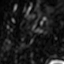

In [230]:
image_arr=crop_contour=load_contour("C:/Users/bvtran/OneDrive - Inside MD Anderson/Documents/MRL_scripts/Scan-2139028-W1.nrrd")
slices=np.expand_dims(image_arr, axis=-1)
img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(slices))
display(img)

In [1]:
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out